## Simple Linear Regression in Python

### 1) Get the dataset

In [16]:
#Supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing the libraries
import numpy as np
import pandas as pd

np.set_printoptions(precision=4)
np.set_printoptions(suppress=True) #Otherwise prints in scientific format

# Importing the dataset
dataset = pd.read_csv('Salary_Data.csv')
dataset


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### 2) Separate the dep and indep variables into a numpy array

In [17]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

### 3) Split the data set

In [18]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3., random_state = 0)
print(len(X_train), len(X_test))

20 10


#### NOTE :

    We dont need feature scaling for Simple Linear Reg, as the libraries will take care of that

### 4) Estimating SLR co-efficients from training data

In [19]:
from sklearn.linear_model import LinearRegression
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model.base:

class LinearRegression(LinearModel, sklearn.base.RegressorMixin)
 |  Ordinary least squares Linear Regression.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : boolean, optional, default True
 |      whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (e.g. data is expected to be already centered).
 |  
 |  normalize : boolean, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean and dividing by the l2-norm.
 |      If you wish to standardize, please use
 |      :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
 |      an estimator with ``normalize=False``.
 |  
 |  copy_X : boolean, optional, default True
 |      If True, X will be copied; else, it may be overwritten.
 | 

In [20]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
print("beta = " , regressor.coef_)
print("alpha = ", regressor.intercept_)


beta =  [9345.9424]
alpha =  26816.19224403117


### 5) Predicting Test Results

In [22]:
y_pred = regressor.predict(X_test)


### 6) Tabulating results

Stacking of 1D numpy arrays column-wise is done using np.column_stack

NOTE: If you use hstack, the arrays have to be reshaped

In [23]:
res = np.column_stack((X_test[:,0],y_pred,y_test))
res

array([[     1.5   ,  40835.1059,  37731.    ],
       [    10.3   , 123079.3994, 122391.    ],
       [     4.1   ,  65134.5563,  57081.    ],
       [     3.9   ,  63265.3678,  63218.    ],
       [     9.5   , 115602.6455, 116969.    ],
       [     8.7   , 108125.8915, 109431.    ],
       [     9.6   , 116537.2397, 112635.    ],
       [     4.    ,  64199.962 ,  55794.    ],
       [     5.3   ,  76349.6872,  83088.    ],
       [     7.9   , 100649.1375, 101302.    ]])

In [24]:
pd.DataFrame(res,columns=["X_test", "y_pred", "y_test"])

,X_test,y_pred,y_test
0,1.5,40835.105909,37731.0
1,10.3,123079.399408,122391.0
2,4.1,65134.556261,57081.0
3,3.9,63265.367772,63218.0
4,9.5,115602.645454,116969.0
5,8.7,108125.891499,109431.0
6,9.6,116537.239698,112635.0
7,4.0,64199.962017,55794.0
8,5.3,76349.687193,83088.0
9,7.9,100649.137545,101302.0


## Visualization

In [25]:
%matplotlib inline 
#Needed to inline graphs
import matplotlib.pyplot as plt
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=20, c='b', marker='o', cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, hold=None, **kwargs)
    Make a scatter plot of x vs y, where x and y are sequence like objects
    of the same lengths.
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data
    
    s : scalar or array_like, shape (n, ), optional, default: 20
        size in points^2.
    
    c : color or sequence of color, optional, default : 'b'
        `c` can be a single color format string, or a sequence of color
        specifications of length `N`, or a sequence of `N` numbers to be
        mapped to colors using the `cmap` and `norm` specified via kwargs
        (see below). Note that `c` should not be a single numeric RGB or
        RGBA sequence because that is indistinguishable from an array of
        values to be colormapped.  `c` can be a 2-D array in which the
        rows a

In [26]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot lines and/or markers to the
    :class:`~matplotlib.axes.Axes`.  *args* is a variable length
    argument, allowing for multiple *x*, *y* pairs with an
    optional format string.  For example, each of the following is
    legal::
    
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
    
    If *x* and/or *y* is 2-dimensional, then the corresponding columns
    will be plotted.
    
    An arbitrary number of *x*, *y*, *fmt* groups can be
    specified, as in::
    
        a.plot(x1, y1, 'g^', x2, y2, 'g-')
    
    Return value is a list of lines that were added.
    
    By default, each line is assigned a different color specified by a
    'color cycle'.  To change this behavior, you can 

#### Visualizing training set results

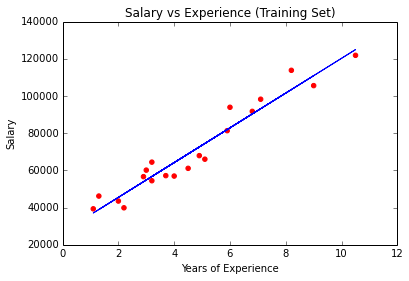

In [27]:
plt.scatter(X_train,y_train, color = 'red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title("Salary vs Experience (Training Set)")
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

#### Visualizing test set results

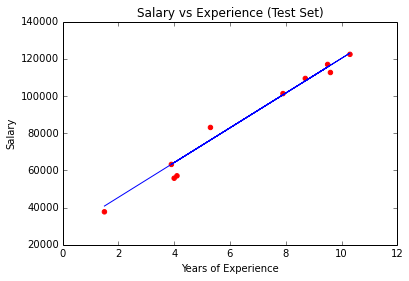

In [28]:
plt.scatter(X_test,y_test, color = 'red')
plt.plot(X_test, y_pred,color='blue')
plt.title("Salary vs Experience (Test Set)")
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()